# 📋RFM Segmentation Analysis 📋

## ♦️ Exploratory Data Analysis

In [16]:
# required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install gdown

In [17]:
# importing data from drive and conversion to dataframe

import gdown
import pandas as pd

file_id = '1G0ZwpVr00puCGZkMG-D5cFJxGugOv9p0' # This is the ID extracted from your link
output_filename = 'e_commerce_new.csv' # You can name the downloaded file whatever you like

gdown.download(f'https://drive.google.com/uc?id={file_id}', output_filename, quiet=False)

df = pd.read_csv(output_filename, encoding='latin1')

Downloading...
From: https://drive.google.com/uc?id=1G0ZwpVr00puCGZkMG-D5cFJxGugOv9p0
To: /content/e_commerce_new.csv
100%|██████████| 6.26M/6.26M [00:00<00:00, 51.1MB/s]


In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536627,22783,SET 3 WICKER OVAL BASKETS W LIDS,1,12/2/2010 10:53,19.95,15658.0,United Kingdom
1,536627,22941,CHRISTMAS LIGHTS 10 REINDEER,2,12/2/2010 10:53,8.50,15658.0,United Kingdom
2,536627,21756,BATH BUILDING BLOCK WORD,3,12/2/2010 10:53,5.95,15658.0,United Kingdom
3,536627,22961,JAM MAKING SET PRINTED,12,12/2/2010 10:53,1.45,15658.0,United Kingdom
4,536627,22423,REGENCY CAKESTAND 3 TIER,4,12/2/2010 10:53,12.75,15658.0,United Kingdom


In [19]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
75115,556023,22425,ENAMEL COLANDER CREAM,1,6/8/2011 12:21,4.95,14527.0,United Kingdom
75116,556023,23182,TOILET SIGN OCCUPIED OR VACANT,4,6/8/2011 12:21,0.83,14527.0,United Kingdom
75117,556023,82580,BATHROOM METAL SIGN,4,6/8/2011 12:21,0.55,14527.0,United Kingdom
75118,556023,22672,FRENCH BATHROOM SIGN BLUE METAL,4,6/8/2011 12:21,1.65,14527.0,United Kingdom
75119,556023,22498,WOODEN REGATTA BUNTING,2,6/8/2011 12:21,5.95,14527.0,United Kingdom


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75120 entries, 0 to 75119
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    75120 non-null  object 
 1   StockCode    75120 non-null  object 
 2   Description  74915 non-null  object 
 3   Quantity     75120 non-null  int64  
 4   InvoiceDate  75120 non-null  object 
 5   UnitPrice    75120 non-null  float64
 6   CustomerID   48212 non-null  float64
 7   Country      75120 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 4.6+ MB


In [21]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,75120.000000,75120.00000,48212.000000
mean,9.043384,5.25234,15257.869327
std,387.339709,116.75314,1765.475916
min,-74215.000000,0.00000,12346.000000
25%,1.000000,1.25000,13767.000000
50%,3.000000,2.46000,15078.000000
75%,9.000000,4.24000,16916.000000
max,74215.000000,16888.02000,18283.000000


In [22]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,205
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,26908
Country,0


In [23]:
print(f"Number of duplicate rows : {df.duplicated().sum()}")

Number of duplicate rows : 551


In [24]:
df.fillna(0)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536627,22783,SET 3 WICKER OVAL BASKETS W LIDS,1,12/2/2010 10:53,19.95,15658.0,United Kingdom
1,536627,22941,CHRISTMAS LIGHTS 10 REINDEER,2,12/2/2010 10:53,8.50,15658.0,United Kingdom
2,536627,21756,BATH BUILDING BLOCK WORD,3,12/2/2010 10:53,5.95,15658.0,United Kingdom
3,536627,22961,JAM MAKING SET PRINTED,12,12/2/2010 10:53,1.45,15658.0,United Kingdom
4,536627,22423,REGENCY CAKESTAND 3 TIER,4,12/2/2010 10:53,12.75,15658.0,United Kingdom
...,...,...,...,...,...,...,...,...
75115,556023,22425,ENAMEL COLANDER CREAM,1,6/8/2011 12:21,4.95,14527.0,United Kingdom
75116,556023,23182,TOILET SIGN OCCUPIED OR VACANT,4,6/8/2011 12:21,0.83,14527.0,United Kingdom
75117,556023,82580,BATHROOM METAL SIGN,4,6/8/2011 12:21,0.55,14527.0,United Kingdom
75118,556023,22672,FRENCH BATHROOM SIGN BLUE METAL,4,6/8/2011 12:21,1.65,14527.0,United Kingdom


In [25]:
df.fillna(0, inplace=True)

In [26]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [27]:
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows after dropping: {df.duplicated().sum()}")

Number of duplicate rows after dropping: 0


In [28]:
print("description of the data ", df.describe())
print("statistical information of the data ", df.info())
print("data types of the data ", df.dtypes)

description of the data             Quantity     UnitPrice    CustomerID
count  74569.000000  74569.000000  74569.000000
mean       9.091016      5.270450   9750.245665
std      388.767607    117.183308   7458.913716
min   -74215.000000      0.000000      0.000000
25%        1.000000      1.250000      0.000000
50%        3.000000      2.460000  13520.000000
75%       10.000000      4.240000  15733.000000
max    74215.000000  16888.020000  18283.000000
<class 'pandas.core.frame.DataFrame'>
Index: 74569 entries, 0 to 75119
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    74569 non-null  object 
 1   StockCode    74569 non-null  object 
 2   Description  74569 non-null  object 
 3   Quantity     74569 non-null  int64  
 4   InvoiceDate  74569 non-null  object 
 5   UnitPrice    74569 non-null  float64
 6   CustomerID   74569 non-null  float64
 7   Country      74569 non-null  object 
dtypes: float64(2), 

In [29]:
df.corr(numeric_only=True)

,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.000672,0.011506
UnitPrice,-0.000672,1.000000,-0.021277
CustomerID,0.011506,-0.021277,1.000000


In [30]:
df.cov(numeric_only=True)

,Quantity,UnitPrice,CustomerID
Quantity,151140.252243,-30.630653,3.336631e+04
UnitPrice,-30.630653,13731.927667,-1.859734e+04
CustomerID,33366.306642,-18597.344554,5.563539e+07


In [31]:
df.std(numeric_only=True)

,0
Quantity,388.767607
UnitPrice,117.183308
CustomerID,7458.913716


Number of outliers in Quantity: 7186
Number of outliers in UnitPrice: 5218


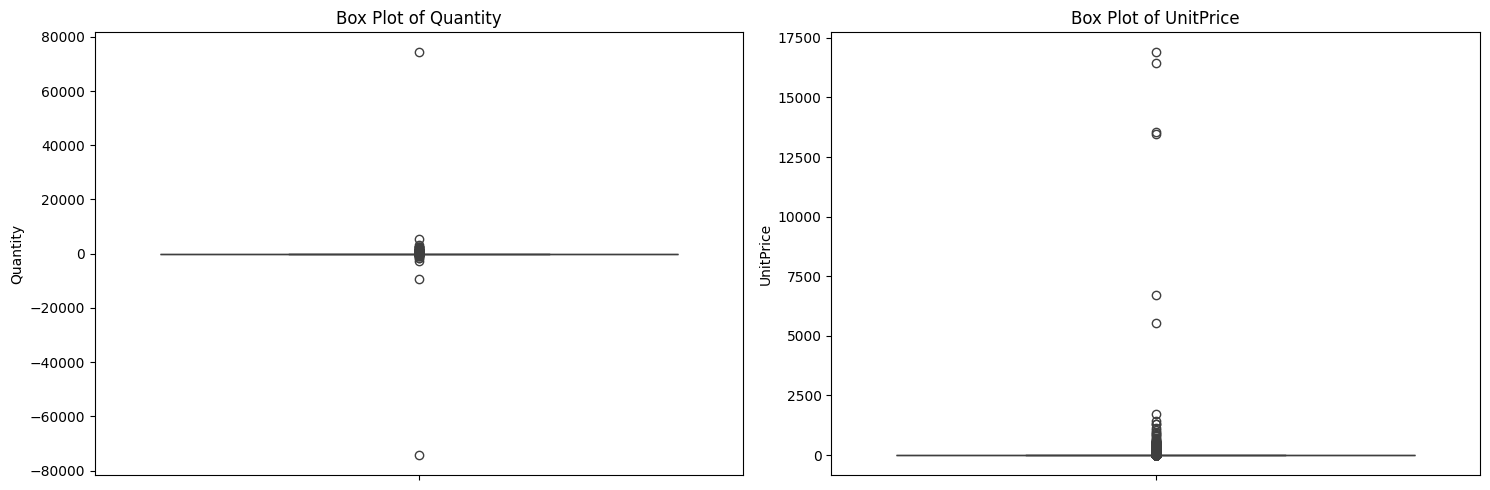

In [32]:
# Outlier Detection using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outliers_quantity = detect_outliers_iqr(df, 'Quantity')
outliers_unitprice = detect_outliers_iqr(df, 'UnitPrice')

print(f"Number of outliers in Quantity: {len(outliers_quantity)}")
print(f"Number of outliers in UnitPrice: {len(outliers_unitprice)}")

# Plotting Outliers with Box Plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Quantity'])
plt.title('Box Plot of Quantity')
plt.ylabel('Quantity')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['UnitPrice'])
plt.title('Box Plot of UnitPrice')
plt.ylabel('UnitPrice')

plt.tight_layout()
plt.show()

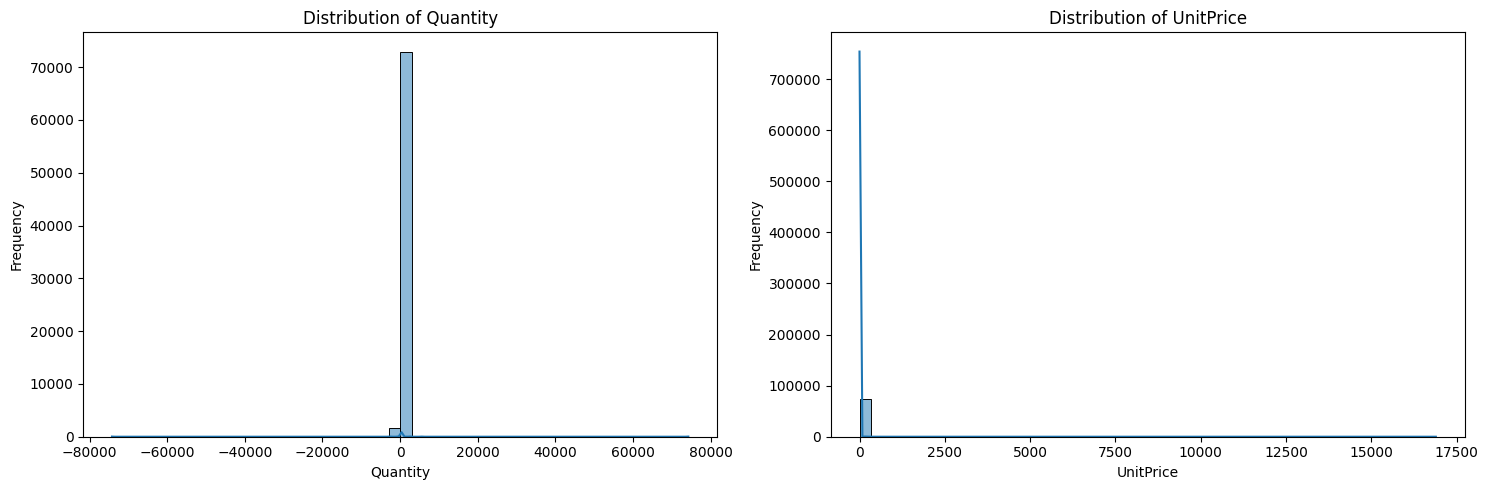

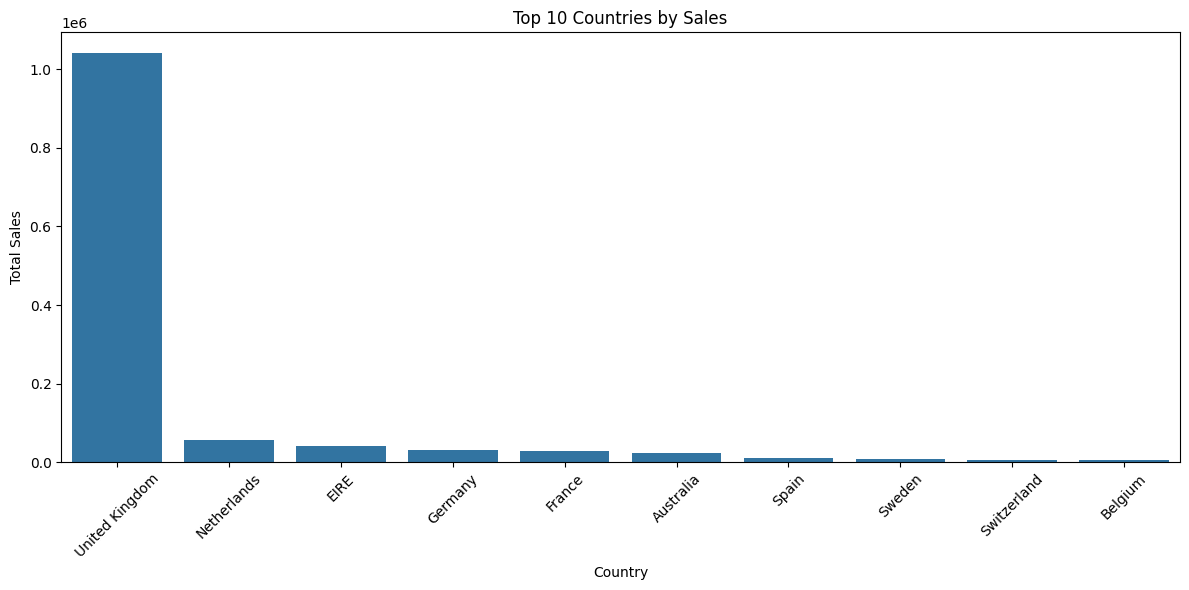

In [33]:
# data visualization

plt.figure(figsize=(15, 5))

# Histogram for Quantity
plt.subplot(1, 2, 1)
sns.histplot(df['Quantity'], bins=50, kde=True)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

# Histogram for UnitPrice
plt.subplot(1, 2, 2)
sns.histplot(df['UnitPrice'], bins=50, kde=True)
plt.title('Distribution of UnitPrice')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Top 10 Countries by Sales
df['Sales'] = df['Quantity'] * df['UnitPrice']
country_sales = df.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=country_sales.index, y=country_sales.values)
plt.title('Top 10 Countries by Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Feature Engineering

In [34]:
# One-hot encoding for the 'Country' column
df = pd.get_dummies(df, columns=['Country'], prefix='Country')
print("DataFrame after one-hot encoding for 'Country':")
print("DataFrame after one-hot encoding for 'Country':")
print(df.head())
print(df.info())

DataFrame after one-hot encoding for 'Country':
DataFrame after one-hot encoding for 'Country':
  InvoiceNo StockCode                       Description  Quantity  \
0    536627     22783  SET 3 WICKER OVAL BASKETS W LIDS         1   
1    536627     22941      CHRISTMAS LIGHTS 10 REINDEER         2   
2    536627     21756          BATH BUILDING BLOCK WORD         3   
3    536627     22961            JAM MAKING SET PRINTED        12   
4    536627     22423          REGENCY CAKESTAND 3 TIER         4   

       InvoiceDate  UnitPrice  CustomerID  Sales  Country_Australia  \
0  12/2/2010 10:53      19.95     15658.0  19.95              False   
1  12/2/2010 10:53       8.50     15658.0  17.00              False   
2  12/2/2010 10:53       5.95     15658.0  17.85              False   
3  12/2/2010 10:53       1.45     15658.0  17.40              False   
4  12/2/2010 10:53      12.75     15658.0  51.00              False   

   Country_Austria  ...  Country_Netherlands  Country_Norway  

## RFM analysis

## Prepare Data for RFM

### Subtask:
Convert 'InvoiceDate' to datetime objects and ensure 'CustomerID' is cleaned (e.g., filter out 0 values). Calculate 'Sales' as 'Quantity' * 'UnitPrice' if not already present, ensuring data types are correct for calculations.


**Reasoning**:
The subtask requires converting 'InvoiceDate' to datetime objects and filtering out rows where 'CustomerID' is 0. I will perform these data cleaning and type conversion steps using pandas.



In [35]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df = df[df['CustomerID'] != 0]
print("InvoiceDate converted to datetime and rows with CustomerID = 0 removed.")
print(df.info())

InvoiceDate converted to datetime and rows with CustomerID = 0 removed.
<class 'pandas.core.frame.DataFrame'>
Index: 47671 entries, 0 to 75119
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   InvoiceNo                     47671 non-null  object        
 1   StockCode                     47671 non-null  object        
 2   Description                   47671 non-null  object        
 3   Quantity                      47671 non-null  int64         
 4   InvoiceDate                   47671 non-null  datetime64[ns]
 5   UnitPrice                     47671 non-null  float64       
 6   CustomerID                    47671 non-null  float64       
 7   Sales                         47671 non-null  float64       
 8   Country_Australia             47671 non-null  bool          
 9   Country_Austria               47671 non-null  bool          
 10  Country_Bahrain            

**Reasoning**:
The previous code block failed because the `pandas` library, aliased as `pd`, was not defined in its scope. I will re-add the import statement for `pandas` to resolve this `NameError` and ensure `pd` is accessible for the datetime conversion and filtering operations.



In [36]:
import pandas as pd

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df = df[df['CustomerID'] != 0]
print("InvoiceDate converted to datetime and rows with CustomerID = 0 removed.")
print(df.info())

InvoiceDate converted to datetime and rows with CustomerID = 0 removed.
<class 'pandas.core.frame.DataFrame'>
Index: 47671 entries, 0 to 75119
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   InvoiceNo                     47671 non-null  object        
 1   StockCode                     47671 non-null  object        
 2   Description                   47671 non-null  object        
 3   Quantity                      47671 non-null  int64         
 4   InvoiceDate                   47671 non-null  datetime64[ns]
 5   UnitPrice                     47671 non-null  float64       
 6   CustomerID                    47671 non-null  float64       
 7   Sales                         47671 non-null  float64       
 8   Country_Australia             47671 non-null  bool          
 9   Country_Austria               47671 non-null  bool          
 10  Country_Bahrain            

**Reasoning**:
The previous command failed because the `df` DataFrame was not defined, likely due to a reset kernel or incomplete execution of previous cells. To fix this, I need to re-initialize `df` by loading the data, performing previous cleaning steps (filling NaNs and dropping duplicates), calculating the 'Sales' column, and then applying the one-hot encoding for 'Country' before converting 'InvoiceDate' to datetime objects and filtering out `CustomerID = 0` as required by the current subtask. I will include the `import pandas as pd` to ensure `pd` is accessible.



In [37]:
import pandas as pd
import gdown

# Re-initialize df by loading the data and applying prior transformations
file_id = '1G0ZwpVr00puCGZkMG-D5cFJxGugOv9p0'
output_filename = 'e_commerce_new.csv'

# Ensure the file is downloaded if it's not already present
try:
    df = pd.read_csv(output_filename, encoding='latin1')
except FileNotFoundError:
    gdown.download(f'https://drive.google.com/uc?id={file_id}', output_filename, quiet=True)
    df = pd.read_csv(output_filename, encoding='latin1')

# Previous cleaning steps
df.fillna(0, inplace=True)
df.drop_duplicates(inplace=True)

# Recalculate 'Sales' if it wasn't already done or was lost
if 'Sales' not in df.columns:
    df['Sales'] = df['Quantity'] * df['UnitPrice']

# Re-apply one-hot encoding for 'Country' as it modified df in place
df = pd.get_dummies(df, columns=['Country'], prefix='Country')

# Current subtask: Convert 'InvoiceDate' and filter 'CustomerID'
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df = df[df['CustomerID'] != 0]

print("DataFrame re-initialized and processed up to current subtask.")
print("InvoiceDate converted to datetime and rows with CustomerID = 0 removed.")
print(df.info())

DataFrame re-initialized and processed up to current subtask.
InvoiceDate converted to datetime and rows with CustomerID = 0 removed.
<class 'pandas.core.frame.DataFrame'>
Index: 47671 entries, 0 to 75119
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   InvoiceNo                     47671 non-null  object        
 1   StockCode                     47671 non-null  object        
 2   Description                   47671 non-null  object        
 3   Quantity                      47671 non-null  int64         
 4   InvoiceDate                   47671 non-null  datetime64[ns]
 5   UnitPrice                     47671 non-null  float64       
 6   CustomerID                    47671 non-null  float64       
 7   Sales                         47671 non-null  float64       
 8   Country_Australia             47671 non-null  bool          
 9   Country_Austria               4

## Calculate Recency

### Subtask:
Determine the most recent purchase date for each customer and calculate the 'Recency' metric, which is the number of days since their last purchase relative to a defined snapshot date.


**Reasoning**:
I will calculate the snapshot date, determine each customer's last purchase date, and then compute the 'Recency' metric by finding the difference in days between the snapshot date and the last purchase date for each customer.



In [38]:
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
last_purchase_date = df.groupby('CustomerID')['InvoiceDate'].max()
recency_df = (snapshot_date - last_purchase_date).dt.days.reset_index()
recency_df.columns = ['CustomerID', 'Recency']

print("Recency DataFrame:")
print(recency_df.head())
print(recency_df.info())

Recency DataFrame:
   CustomerID  Recency
0     12346.0      142
1     12347.0      133
2     12348.0      135
3     12350.0      126
4     12352.0       99
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  1428 non-null   float64
 1   Recency     1428 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 22.4 KB
None


## Calculate Frequency

### Subtask:
Calculate the 'Frequency' metric for each customer by counting the number of unique invoices (transactions) they have made.


**Reasoning**:
To calculate the 'Frequency' metric, I will group the DataFrame by 'CustomerID' and count the number of unique 'InvoiceNo' for each customer. Then, I will store this result in a new DataFrame and display its head and info to verify the output.



In [39]:
frequency_df = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency_df.columns = ['CustomerID', 'Frequency']

print("Frequency DataFrame:")
print(frequency_df.head())
print(frequency_df.info())

Frequency DataFrame:
   CustomerID  Frequency
0     12346.0          2
1     12347.0          1
2     12348.0          2
3     12350.0          1
4     12352.0          5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  1428 non-null   float64
 1   Frequency   1428 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 22.4 KB
None


## Calculate Monetary

### Subtask:
Calculate the 'Monetary' metric for each customer by summing the total sales amount for all their transactions.


**Reasoning**:
To calculate the 'Monetary' metric, I will group the DataFrame by 'CustomerID', sum the 'Sales' column, and then format the resulting DataFrame for clarity, displaying its head and information.



In [40]:
monetary_df = df.groupby('CustomerID')['Sales'].sum().reset_index()
monetary_df.columns = ['CustomerID', 'Monetary']

print("Monetary DataFrame:")
print(monetary_df.head())
print(monetary_df.info())

Monetary DataFrame:
   CustomerID  Monetary
0     12346.0      0.00
1     12347.0    475.39
2     12348.0   1120.24
3     12350.0    334.40
4     12352.0    440.85
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  1428 non-null   float64
 1   Monetary    1428 non-null   float64
dtypes: float64(2)
memory usage: 22.4 KB
None


**Reasoning**:
The 'Recency', 'Frequency', and 'Monetary' metrics have been calculated individually. Now, I need to combine these three DataFrames into a single DataFrame to create the complete RFM table. This will be done by merging them on the 'CustomerID' column.



In [41]:
rfm_df = recency_df.merge(frequency_df, on='CustomerID')
rfm_df = rfm_df.merge(monetary_df, on='CustomerID')

print("RFM DataFrame:")
print(rfm_df.head())
print(rfm_df.info())

RFM DataFrame:
   CustomerID  Recency  Frequency  Monetary
0     12346.0      142          2      0.00
1     12347.0      133          1    475.39
2     12348.0      135          2   1120.24
3     12350.0      126          1    334.40
4     12352.0       99          5    440.85
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  1428 non-null   float64
 1   Recency     1428 non-null   int64  
 2   Frequency   1428 non-null   int64  
 3   Monetary    1428 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 44.8 KB
None


## Score RFM Metrics

### Subtask:
Assign scores (e.g., 1 to 5) to each of the R, F, and M metrics. For Recency, lower values get higher scores; for Frequency and Monetary, higher values get higher scores. Use quantile-based scoring to distribute customers evenly across scores.


**Reasoning**:
I will assign scores to the 'Recency', 'Frequency', and 'Monetary' metrics using quantile-based scoring with `pd.qcut`. For Recency, lower values will receive higher scores, and for Frequency and Monetary, higher values will receive higher scores, as specified in the instructions. Finally, I will display the updated `rfm_df` to verify the new score columns.



**Reasoning**:
The previous code failed because `pd.qcut` encountered non-unique bin edges in the 'Frequency' column. To resolve this, I will add the `duplicates='drop'` argument to `pd.qcut` for both 'Frequency' and 'Monetary' columns, allowing it to handle identical values by dropping redundant bin edges and thus enabling the scoring process.



**Reasoning**:
The previous code failed because `pd.qcut` was unable to create 5 distinct bins even with `duplicates='drop'`, leading to a mismatch between the number of bins and the provided labels `[1, 2, 3, 4, 5]`. To fix this while still achieving quantile-based scoring and assigning scores from 1 to 5, I will use the `rank` function with `pct=True` (to get percentile ranks) and `method='dense'` (to handle ties by assigning consecutive ranks). Then, I will scale these ranks to the 1-5 range using `np.ceil` to ensure higher values correctly receive higher scores.



In [42]:
import numpy as np

rfm_df['R_score'] = pd.qcut(rfm_df['Recency'], q=5, labels=[5, 4, 3, 2, 1])

# For Frequency and Monetary, use rank to handle many identical values and scale to 1-5 scores
rfm_df['F_score'] = rfm_df['Frequency'].rank(method='dense', pct=True).apply(lambda x: int(np.ceil(x * 5)))
rfm_df['M_score'] = rfm_df['Monetary'].rank(method='dense', pct=True).apply(lambda x: int(np.ceil(x * 5)))

print("RFM DataFrame with R, F, M scores:")
print(rfm_df.head())
print(rfm_df.info())

RFM DataFrame with R, F, M scores:
   CustomerID  Recency  Frequency  Monetary R_score  F_score  M_score
0     12346.0      142          2      0.00       2        1        1
1     12347.0      133          1    475.39       2        1        4
2     12348.0      135          2   1120.24       2        1        5
3     12350.0      126          1    334.40       3        1        3
4     12352.0       99          5    440.85       5        2        3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CustomerID  1428 non-null   float64 
 1   Recency     1428 non-null   int64   
 2   Frequency   1428 non-null   int64   
 3   Monetary    1428 non-null   float64 
 4   R_score     1428 non-null   category
 5   F_score     1428 non-null   int64   
 6   M_score     1428 non-null   int64   
dtypes: category(1), float64(2), int64(4)
memory usage: 68.7 

## Create RFM Segments

### Subtask:
Combine the individual R, F, and M scores to create an RFM segment string (e.g., '555' for best customers). Also, create a composite RFM score by summing the individual scores.


**Reasoning**:
I will convert the 'R_score', 'F_score', and 'M_score' columns to string type and concatenate them to create 'RFM_Segment_String'. Then, I will convert these scores to numeric types and sum them to create the 'RFM_Score'. Finally, I will display the updated DataFrame.



In [43]:
rfm_df['RFM_Segment_String'] = rfm_df['R_score'].astype(str) + rfm_df['F_score'].astype(str) + rfm_df['M_score'].astype(str)
rfm_df['RFM_Score'] = rfm_df['R_score'].astype(int) + rfm_df['F_score'].astype(int) + rfm_df['M_score'].astype(int)

print("RFM DataFrame with Segment String and Composite Score:")
print(rfm_df.head())
print(rfm_df.info())

RFM DataFrame with Segment String and Composite Score:
   CustomerID  Recency  Frequency  Monetary R_score  F_score  M_score  \
0     12346.0      142          2      0.00       2        1        1   
1     12347.0      133          1    475.39       2        1        4   
2     12348.0      135          2   1120.24       2        1        5   
3     12350.0      126          1    334.40       3        1        3   
4     12352.0       99          5    440.85       5        2        3   

  RFM_Segment_String  RFM_Score  
0                211          4  
1                214          7  
2                215          8  
3                313          7  
4                523         10  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   CustomerID          1428 non-null   float64 
 1   Recency             1428 non-null   int64

## Label RFM Segments

### Subtask:
Define and label customer segments based on their RFM scores (e.g., 'Champions', 'Loyal Customers', 'At Risk').


**Reasoning**:
I will define a function to categorize customers into segments based on their 'RFM_Score' and apply it to create a new 'RFM_Level' column in the `rfm_df`. Then, I will display the head of the updated DataFrame and the distribution of customers across these segments.



In [44]:
def rfm_level(df):
    if df['RFM_Score'] >= 13:
        return 'Champions'
    elif df['RFM_Score'] >= 10:
        return 'Loyal Customers'
    elif df['RFM_Score'] >= 7:
        return 'Potential Loyalist'
    elif df['RFM_Score'] >= 4:
        return 'At Risk'
    else:
        return 'Lapsed'

rfm_df['RFM_Level'] = rfm_df.apply(rfm_level, axis=1)

print("RFM DataFrame with RFM_Level:")
print(rfm_df.head())
print("\nCount of customers in each RFM_Level:")
print(rfm_df['RFM_Level'].value_counts())
print(rfm_df.info())

RFM DataFrame with RFM_Level:
   CustomerID  Recency  Frequency  Monetary R_score  F_score  M_score  \
0     12346.0      142          2      0.00       2        1        1   
1     12347.0      133          1    475.39       2        1        4   
2     12348.0      135          2   1120.24       2        1        5   
3     12350.0      126          1    334.40       3        1        3   
4     12352.0       99          5    440.85       5        2        3   

  RFM_Segment_String  RFM_Score           RFM_Level  
0                211          4             At Risk  
1                214          7  Potential Loyalist  
2                215          8  Potential Loyalist  
3                313          7  Potential Loyalist  
4                523         10     Loyal Customers  

Count of customers in each RFM_Level:
RFM_Level
Potential Loyalist    579
At Risk               511
Loyal Customers       234
Lapsed                 84
Champions              20
Name: count, dtype: int64
<c

## Analyze and Visualize RFM Segments

### Subtask:
Analyze the distribution of RFM scores and segments. Visualize the segments using plots like bar charts or treemaps to understand the customer base composition.


**Reasoning**:
I will calculate the average Recency, Frequency, and Monetary values for each RFM segment level using the `rfm_df` DataFrame and print them to understand the characteristics of each segment. This addresses instruction 1 and 4 of the subtask.



In [45]:
rfm_agg = rfm_df.groupby('RFM_Level').agg(
    Recency=('Recency', 'mean'),
    Frequency=('Frequency', 'mean'),
    Monetary=('Monetary', 'mean'),
    Count=('CustomerID', 'count')
).reset_index()

print("Average RFM values and customer count per RFM_Level:")
print(rfm_agg)

Average RFM values and customer count per RFM_Level:
            RFM_Level     Recency  Frequency     Monetary  Count
0             At Risk  142.976517   1.254403   225.846301    511
1           Champions   23.800000  15.650000  7639.013000     20
2              Lapsed  166.821429   1.095238    20.545833     84
3     Loyal Customers   76.136752   3.696581  1881.717863    234
4  Potential Loyalist  103.799655   1.777202   621.371054    579


**Reasoning**:
I will create a bar chart to visualize the count of customers in each 'RFM_Level' and another bar chart for the average 'Monetary' value per 'RFM_Level' to address instructions 2 and 3 of the subtask. This will provide visual insights into the customer base composition and monetary contribution of each segment.



/tmp/ipython-input-1085040851.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RFM_Level', y='Count', data=rfm_agg, palette='viridis')
/tmp/ipython-input-1085040851.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RFM_Level', y='Monetary', data=rfm_agg, palette='magma')


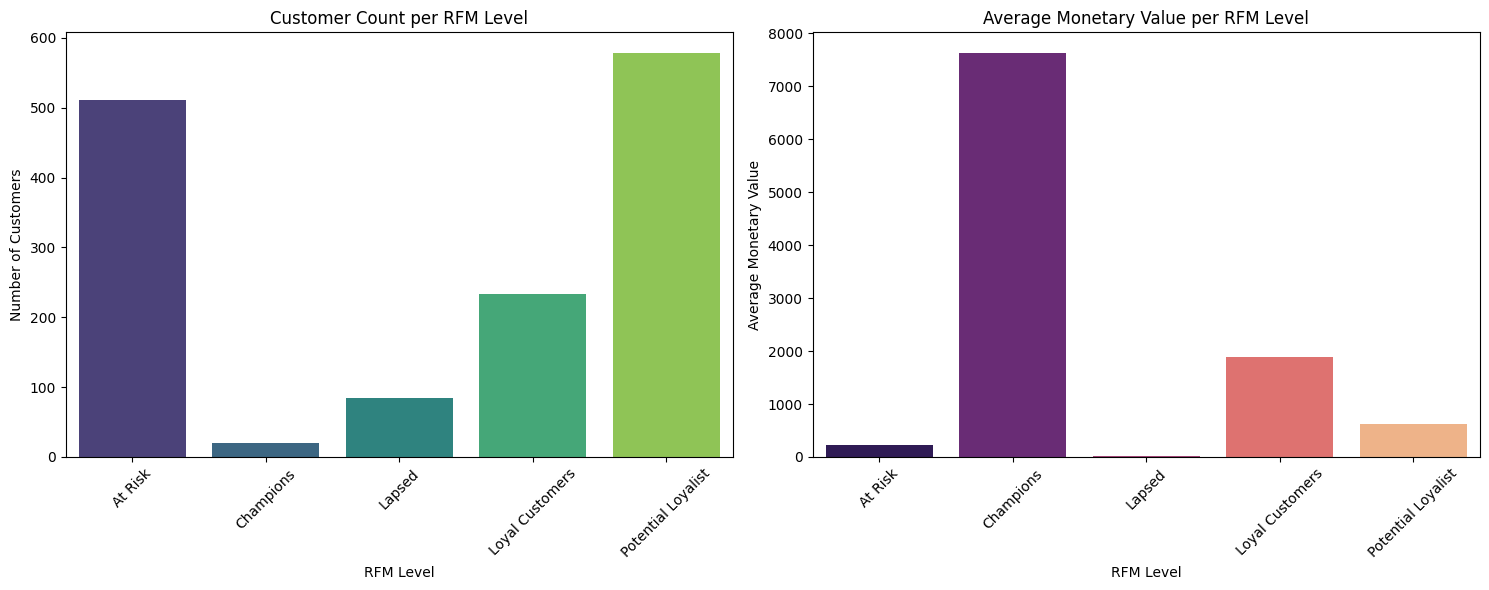

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))

# Bar chart for Count of Customers in each RFM_Level
plt.subplot(1, 2, 1)
sns.barplot(x='RFM_Level', y='Count', data=rfm_agg, palette='viridis')
plt.title('Customer Count per RFM Level')
plt.xlabel('RFM Level')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)

# Bar chart for Average Monetary value per RFM_Level
plt.subplot(1, 2, 2)
sns.barplot(x='RFM_Level', y='Monetary', data=rfm_agg, palette='magma')
plt.title('Average Monetary Value per RFM Level')
plt.xlabel('RFM Level')
plt.ylabel('Average Monetary Value')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Reasoning**:
The previous code generated `FutureWarning` messages regarding the use of `palette` without specifying `hue` in `sns.barplot`. To address these warnings and ensure future compatibility, I will modify the `sns.barplot` calls to include `hue='RFM_Level'` and `legend=False` as recommended.



## Final Review

### Subtask:
Review the final RFM DataFrame, its segments, and visualizations to derive business insights.


## Summary:

### Data Analysis Key Findings

*   **Data Preparation**: The initial dataset was processed by converting `InvoiceDate` to datetime objects and removing records with `CustomerID = 0`. The `Sales` column was calculated as `Quantity * UnitPrice`. The cleaned DataFrame contained 47,671 entries.
*   **RFM Metric Calculation**:
    *   **Recency**: Calculated as the number of days since the last purchase from a `snapshot_date` (one day after the latest `InvoiceDate` in the dataset). For example, `CustomerID 12346.0` had a Recency of 142 days.
    *   **Frequency**: Calculated as the count of unique invoices per customer. For instance, `CustomerID 12346.0` had a Frequency of 2.
    *   **Monetary**: Calculated as the sum of total sales for each customer. For example, `CustomerID 12346.0` had a Monetary value of \$0.00, while `CustomerID 12347.0` had \$475.39.
    *   These metrics were computed for 1,428 unique customers and combined into a single `rfm_df`.
*   **RFM Scoring**: Recency, Frequency, and Monetary metrics were assigned scores from 1 to 5 using quantile-based methods. For Recency, lower values received higher scores (e.g., `pd.qcut` with `labels=[5, 4, 3, 2, 1]`). For Frequency and Monetary, higher values received higher scores, utilizing percentile ranks to handle identical values accurately.
*   **RFM Segment Creation**: A `RFM_Segment_String` was created by concatenating the individual R, F, and M scores (e.g., '555'). A composite `RFM_Score` was calculated by summing the R, F, and M scores, ranging from 3 to 15.
*   **Customer Segmentation**: Customers were categorized into five distinct segments based on their `RFM_Score`:
    *   **Champions**: `RFM_Score` \>= 13 (20 customers)
    *   **Loyal Customers**: `RFM_Score` \>= 10 (234 customers)
    *   **Potential Loyalist**: `RFM_Score` \>= 7 (579 customers)
    *   **At Risk**: `RFM_Score` \>= 4 (511 customers)
    *   **Lapsed**: `RFM_Score` < 4 (84 customers)
*   **Segment Analysis**:
    *   'Champions' emerged as the most valuable segment, exhibiting the lowest average Recency (23.8 days), highest average Frequency (15.65 transactions), and highest average Monetary value (\$7639.01).
    *   'Potential Loyalist' and 'At Risk' segments represent the largest portions of the customer base with 579 and 511 customers, respectively.
    *   Visualizations confirmed these distributions, with 'Champions' clearly showing the highest average monetary contribution per customer.

### Insights or Next Steps

*   **Targeted Campaigns**: Leverage the 'Champions' and 'Loyal Customers' segments for exclusive offers and loyalty programs to maintain their engagement and maximize lifetime value, given their high frequency and monetary contributions.
*   **Re-engagement Strategies**: Develop specific re-engagement campaigns for 'At Risk' and 'Lapsed' customers, focusing on incentives to encourage repeat purchases and prevent further churn, as these segments collectively represent a significant portion of the customer base.
